In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [3]:
np.random.seed(42)
x,y = make_regression(n_samples=300,n_features=1,noise=10,random_state=42)
y = y + 2*x.flatten()**2 - 3*x.flatten()**3 + np.random.normal(0,10,len(y))

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


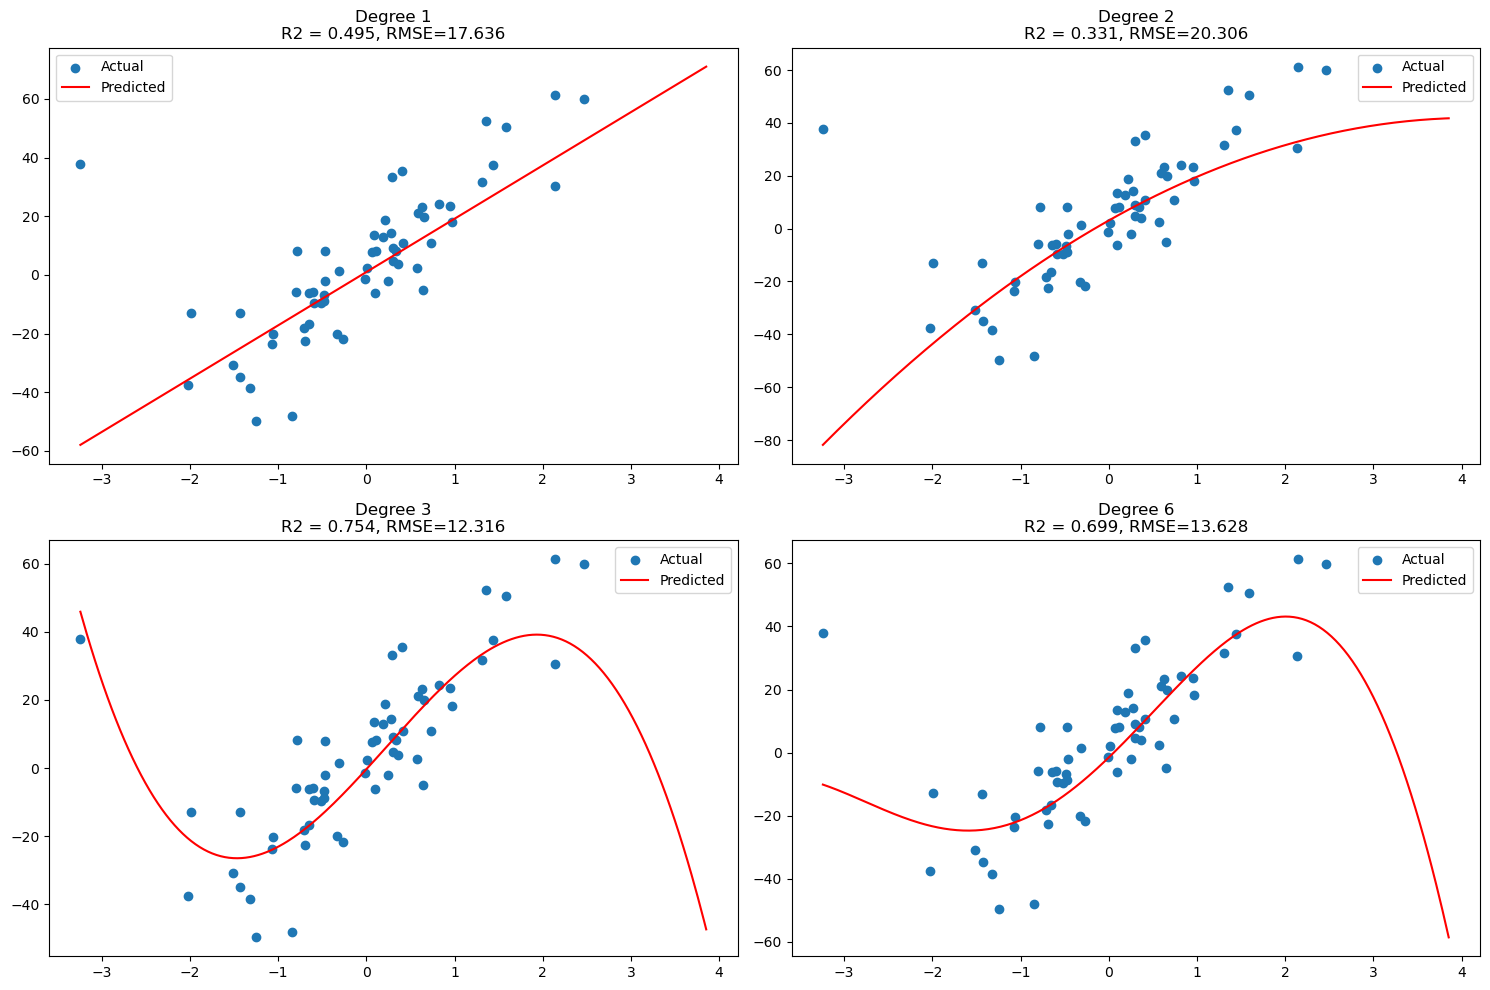

In [6]:
degrees = [1,2,3,6]
fig,axes = plt.subplots(2,2, figsize=(15,10))
for ax,degree in zip(axes.flatten(),degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)    
    y_pred = model.predict(x_test)
    r2, rmse = r2_score(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

    ax_curve = np.linspace(x.min(),x.max(),300).reshape(-1,1)
    ax.scatter(x_test,y_test,label='Actual')
    ax.plot(ax_curve,model.predict(ax_curve), color='red', label='Predicted')
    ax.legend()
    ax.set_title(f"Degree {degree}\nR2 = {r2:.3f}, RMSE={rmse:.3f}")

plt.tight_layout()